In [28]:
%matplotlib inline
from sklearn.datasets import make_blobs, make_circles, make_moons, make_classification, load_breast_cancer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
import datetime
from time import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as logisr
from sklearn.metrics import confusion_matrix as CM, precision_score as p, recall_score as r, roc_auc_score, roc_curve

# 分类模型评估指标

**confuse matrixs**

$\bullet$ True Positive：若一个实例为正类，并且被预测为正类，那么就是真正类TP  
$\bullet$ False Negitive：若一个实例为正类，但被预测为负类，那么就是假负类FN  
$\bullet$ False Positive：若一个实例为负类，但被预测为正类，那么就是假正类FP  
$\bullet$ True Negitive：若一个实例为负类，且被预测为负类，那么就是真负类TN  
混淆矩阵 $\begin{bmatrix}
TN & FP \\
FN & TP 
\end{bmatrix}$  
**Accuracy**

$$\frac{TP+TN}{ALL}$$  
不适合样本不均匀的情况  

**Precision** 正样本占预测为正样本的百分比 

精确率高，关注的是模型预测为正类的结果有多“纯”（即“说它是，它就是”的可靠性）。

$$\frac{TP}{TP+FP}$$  

**Recall** 查全率 正确预测为正样本占正样本的百分比  

召回率高，关注的是模型识别出所有实际正类的能力有多强（即“是它，我就能找到它”的完整性）。

$$\frac{TP}{TP+FN}$$

**F1-Score** 精确率和召回率是相互影响的，一个升高则另一个下降
$$\frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$$

[0, 1]，越靠近1越好

**Specificify** 特异度 实际为负样本中被识别出来的比例
$$\frac{TN}{TN+FP}$$


**FPR** False Posiitive Rate 假阳性率 实际为负类的样本，但是模型错误地将其判断为正类
$$\frac{FP}{FP+TN}$$  
FPR = 1 - Specificity 

| 指标 | 关注点 | 分子 | 分母 | 理想值 |
| :--------- | :-------------------------------------- | :------------------------- | :-------------------------- | :---------- |
| **精确率 (Precision)** | **预测为正类**的结果有多“纯” | 真阳性 (TP) | 预测为正类的总数 (TP + FP) | 越高越好 |
| **召回率 (Recall)** | **实际正类**被找出来的比例有多高 | 真阳性 (TP) | 实际正类的总数 (TP + FN) | 越高越好 |
| **特异度 (Specificity)** | **实际负类**被找出来的比例有多高 | 真阴性 (TN) | 实际负类的总数 (TN + FP) | 越高越好 |
| **假阳性率 (FPR)** | **实际负类**被错误预测为正类的比例有多高 | 假阳性 (FP) | 实际负类的总数 (TN + FP) | 越低越好 |


**ROC曲线**(Receiver Operating Characteristic)  

$\bullet$ 假正利率FPR为x轴，真正利率TPR为y轴  
TPR真正利率：所有实际为正例的样本中，被正确地判断为正例的概率$\frac{TP}{TR+FN}$  
FPR假正利率：所有实际为负例的样本中，被错误地判断为正例的概率$\frac{FP}{TN+FP}$  

**P-R曲线**

$\bullet$ 描述精确率和召回率变化的曲线  
$\bullet$ 以召回率为横轴，以精确率为纵轴     
$\bullet$ 右上往左下走，越靠近右上越好  
$\bullet$ 很适用于不平衡的数据(ROC会高估模型性能)   
$\bullet$ 曲线下的面积为AP(Average Precision)，这个面积越大说明在何种阈值下都兼顾了recall和precision  


**AUC**(Area Under Curve)  
显然这个数值不会大于1，一般在0.5和1之间，越大说明模型效力越高


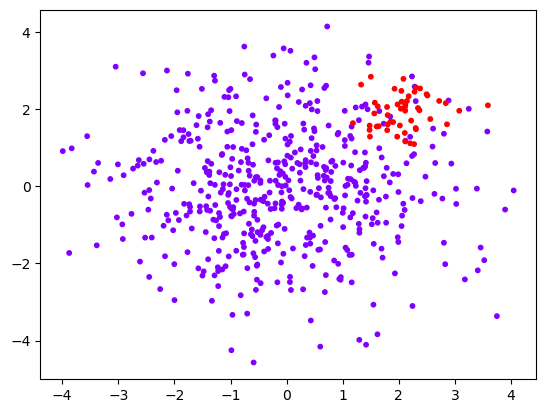

In [2]:
class_1 = 500
class_2 = 50
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
x, y = make_blobs(n_samples=[class_1, class_2]
                  , centers=centers
                  , cluster_std=clusters_std
                  , random_state=0
                  , shuffle=False)

plt.scatter(x[:, 0], x[:, 1], c = y, cmap='rainbow', s = 10)


In [3]:
clf = SVC(kernel='linear').fit(x, y)
weightclf = SVC(kernel='linear', class_weight={1: 10}).fit(x, y)

### Precision

In [4]:
# TP/(TP+FP) Precision
(y[y==clf.predict(x)]==1).sum()/(clf.predict(x)==1).sum()


0.7142857142857143

In [5]:
(y[y==weightclf.predict(x)]==1).sum()/(weightclf.predict(x)==1).sum()

0.5102040816326531

可以看出，作了样本平衡之后，精确率是下降的。说明有更多的多数类的紫色点被我们误伤了。

在现实的样本不平衡例子中，**当每一次将多数类判断错误的成本非常高昂的时候（比如召回不合格样本），我们会追求高精确度。精确度越低，我们对多数类的判断就越错误。

如果我们不计一切代价捕获少数类（比如找出人群中的潜在犯罪者），那么我们并不在意精确度。

### Recall


In [6]:
# TP/TP+FN
(y[y==clf.predict(x)]==1).sum() / (y==1).sum()

0.6

In [7]:
(y[y==weightclf.predict(x)]==1).sum() / (y==1).sum()

1.0

### Specificity

In [8]:
(y[y == clf.predict(x)] == 0).sum()/(y == 0).sum()

0.976

In [9]:
(y[y == weightclf.predict(x)] == 0).sum()/(y == 0).sum()

0.904

### Confusion Metrics

| 类 | 含义 |
| :------------------------------- | :----------------------------------------------------------------------------- |
| `sklearn.metrics.confusion_matrix` | 混淆矩阵 |
| `sklearn.metrics.accuracy_score` | 准确率 accuracy |
| `sklearn.metrics.precision_score` | 精确度 precision |
| `sklearn.metrics.recall_score` | 召回率 recall |
| `sklearn.metrics.precision_recall_curve` | 精确度-召回率平衡曲线，可以展示不同阈值下的精确度和召回率如何变化。 |
| `sklearn.metrics.f1_score` | F1 measure |

### ROC Curve & AUC

##### 什么是 ROC 曲线？

**ROC 曲线（Receiver Operating Characteristic Curve）** 是一种常用的图形化工具，用于评估二分类模型的性能。它通过可视化模型在不同分类阈值下，**真阳性率 (True Positive Rate, TPR)** 和 **假阳性率 (False Positive Rate, FPR)** 之间的权衡关系来展示模型的表现。

* **真阳性率 (TPR)** 也称为**召回率 (Recall)** 或**敏感度 (Sensitivity)**：
    $$
    \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
    $$
    表示在所有实际为正类的样本中，模型正确识别为正类的比例。

* **假阳性率 (FPR)**：
    $$
    \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
    $$
    表示在所有实际为负类的样本中，模型错误识别为正类的比例（误报率）。
    值得注意的是，$\text{FPR} = 1 - \text{Specificity}$（特异度）。

##### ROC 曲线的绘制原理

大多数分类模型（如逻辑回归、SVM、决策树等）在进行分类预测时，通常会先输出一个概率值（或决策分数），表示样本属于某个类别的可能性。然后，我们根据一个**阈值 (threshold)** 来将这些概率值转化为最终的类别预测：
* 如果概率/分数 **大于等于阈值**，则预测为正类。
* 如果概率/分数 **小于阈值**，则预测为负类。

ROC 曲线的绘制过程就是：
1.  **选择一系列不同的阈值。**
2.  **对于每一个阈值：**
    * 根据该阈值计算出模型的预测结果。
    * 计算当前阈值下的 **TPR** 和 **FPR**。
3.  **将 (FPR, TPR) 作为坐标点绘制在二维平面上。**
    * X 轴是 FPR（从 0 到 1）。
    * Y 轴是 TPR（从 0 到 1）。
    * 通过连接这些点，就得到了 ROC 曲线。

##### ROC 曲线的解读

* **理想的 ROC 曲线：** 曲线会尽可能地靠近图的**左上角**。这意味着在很低的 FPR（很少误报）的情况下，模型就能达到很高的 TPR（很高召回率）。
    * **点 (0, 1)**：表示完美的分类器，FPR 为 0（没有误报），TPR 为 1（所有正类都被正确识别）。
* **对角线 (y=x)：** 这条从 (0, 0) 到 (1, 1) 的对角线代表一个**随机分类器**（Random Classifier）。
    * 如果模型的 ROC 曲线沿着这条对角线，说明其分类性能与随机猜测没有区别。
    * 任何低于这条对角线的曲线都表明模型的性能比随机猜测还要差（这通常意味着模型或数据处理有问题）。
* **曲线形状：** 曲线越是凸向左上角，模型的性能越好。

##### AUC (Area Under the Curve)

通常，我们不单独看 ROC 曲线的形状，而是结合 **AUC (Area Under the Curve)** 值来评估。

* **定义：** AUC 就是 ROC 曲线下方的面积。
* **范围：** AUC 的值介于 0 到 1 之间。
* **解读：**
    * **AUC = 1**：完美的分类器，能将所有正类和负类完全分开。
    * **AUC = 0.5**：代表一个随机分类器（与对角线一致）。
    * **AUC < 0.5**：比随机猜测还差，模型可能学到了相反的模式。
    * **AUC 越大，模型的性能越好。** 它表示模型将随机选择的正样本排在随机选择的负样本前面的概率。

##### 为什么 ROC 和 AUC 很重要？

1.  **阈值无关性：** ROC 曲线展示了模型在**所有可能阈值下**的性能。AUC 值提供了一个综合的性能指标，不依赖于任何特定的分类阈值。这使得 ROC/AUC 非常适合在不知道最佳阈值，或者不同阈值有不同业务含义的场景下评估模型。
2.  **处理类别不平衡：** 相比于准确率，ROC/AUC 对**类别不平衡问题**的敏感度较低。准确率在类别不平衡时可能会产生误导（例如，一个总是预测多数类的模型可能有高准确率）。而 ROC 曲线是基于 TPR 和 FPR，它们都只关注各自类别内部的表现，因此更能反映模型对少数类的识别能力。
3.  **可视化和比较：** 能够直观地比较不同模型的性能。曲线越靠近左上角，AUC 值越大，模型性能越好。

##### 总结：

ROC 曲线是一个强大的工具，用于可视化和评估二分类模型在不同决策阈值下的性能权衡。AUC 值则提供了一个单一的、对阈值不敏感的、对类别不平衡鲁棒的综合性能指标。



#### Probability & Threshold

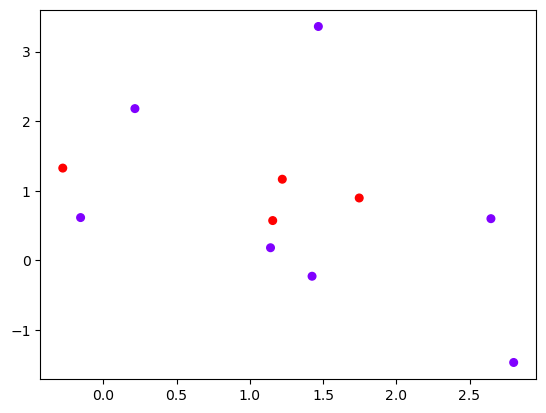

In [10]:
class_1 = 7
class_2 = 4
centers_ = [[0.0, 0.0], [1, 1]]
clusters_std_ = [0.5, 1]

x_, y_ = make_blobs(n_samples=[class_1, class_2]
                    , centers=  centers_
                    , cluster_std=clusters_std
                    , random_state=0
                    , shuffle=False)
plt.scatter(x_[:, 0], x_[:, 1], c = y_, cmap = 'rainbow', s = 30)

In [11]:
clf_logis = logisr().fit(x_, y_)
prob = clf_logis.predict_proba(x_)
prob

array([[0.73145533, 0.26854467],
       [0.61906672, 0.38093328],
       [0.76465339, 0.23534661],
       [0.66850038, 0.33149962],
       [0.54752972, 0.45247028],
       [0.54944197, 0.45055803],
       [0.6441261 , 0.3558739 ],
       [0.63505362, 0.36494638],
       [0.67327058, 0.32672942],
       [0.63941258, 0.36058742],
       [0.52754078, 0.47245922]])

In [12]:
prob = pd.DataFrame(prob)
prob.columns = ['0', '1']
prob

,0,1
0,0.731455,0.268545
1,0.619067,0.380933
2,0.764653,0.235347
3,0.668500,0.331500
4,0.547530,0.452470
5,0.549442,0.450558
6,0.644126,0.355874
7,0.635054,0.364946
8,0.673271,0.326729
9,0.639413,0.360587


In [13]:
# 设置阈值为0.7
for i in range(prob.shape[0]):
    if prob.loc[i, '0'] > 0.7:
        prob.loc[i, 'pred'] = 0
    else:
        prob.loc[i, 'pred'] = 1

In [14]:
prob['y_true'] = y_
prob = prob.sort_values(by='1', ascending=False)
prob

,0,1,pred,y_true
10,0.527541,0.472459,1.0,1
4,0.547530,0.452470,1.0,0
5,0.549442,0.450558,1.0,0
1,0.619067,0.380933,1.0,0
7,0.635054,0.364946,1.0,1
9,0.639413,0.360587,1.0,1
6,0.644126,0.355874,1.0,0
3,0.668500,0.331500,1.0,0
8,0.673271,0.326729,1.0,1
0,0.731455,0.268545,0.0,0


In [15]:
CM(prob.loc[:, 'y_true'], prob.loc[:, 'pred'], labels = [1, 0])# 少数类为1

array([[4, 0],
       [5, 2]], dtype=int64)

In [16]:
p(prob.loc[:, 'y_true'], prob.loc[:, 'pred'], labels = [1, 0])

0.4444444444444444

In [17]:
r(prob.loc[:, 'y_true'], prob.loc[:, 'pred'], labels = [1, 0])

1.0

In [18]:
# 设置阈值为0.6
for i in range(prob.shape[0]):
    if prob.loc[i, '0'] > 0.6:
        prob.loc[i, 'pred'] = 0
    else:
        prob.loc[i, 'pred'] = 1


prob['y_true'] = y_
prob = prob.sort_values(by='1', ascending=False)

CM(prob.loc[:, 'y_true'], prob.loc[:, 'pred'], labels = [1, 0])# 少数类为1


array([[0, 4],
       [3, 4]], dtype=int64)

In [19]:
p(prob.loc[:, 'y_true'], prob.loc[:, 'pred'], labels = [1, 0])


0.0

In [20]:
r(prob.loc[:, 'y_true'], prob.loc[:, 'pred'], labels = [1, 0])

0.0

### 用SVM预测prob

| 参数 | 含义 |
| :------- | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `probability` | 布尔值，可不填，默认 `False` <br><br> 是否启用概率估计。进行此操作必须在调用 `fit` 之前启用它，启用此功能会减慢 SVM 的运算速度。 <br><br> 设置为 `True` 则会启动，启用之后，SVC 的接口 `predict_proba` 和 `predict_log_proba` 将生效。 <br><br> 在二分类情况下，SVC 将使用 Platt 缩放来生成概率，即在 `decision_function` 生成的距离上进行 Sigmoid 压缩，并附加训练数据的交叉验证拟合，来生成类逻辑回归的 SVM 分数。 <br><br> 在多分类状况下，参考 Wu et al. (2004) 发表的文章来将二分类推广到多分类。 |

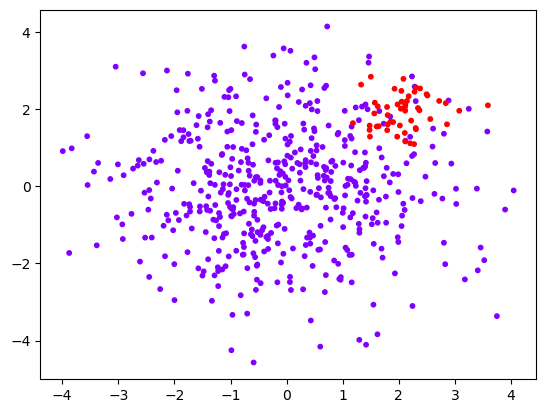

In [21]:
class_1 = 500
class_2 = 50
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
x, y = make_blobs(n_samples=[class_1, class_2]
                  , centers=centers
                  , cluster_std=clusters_std
                  , random_state=0
                  , shuffle=False)

plt.scatter(x[:, 0], x[:, 1], c = y, cmap='rainbow', s = 10)

In [22]:
clf_proba = SVC(kernel='linear', C = 1.0, probability=True).fit(x, y)
clf_proba.predict_proba(x).shape
# 各类标签下的概率

(550, 2)

In [23]:
clf_proba.decision_function(x).shape, clf_proba.decision_function(x)

((550,),
 array([ -0.39182241,   0.95617053,  -2.24996184,  -2.63659269,
         -3.65243197,  -1.67311996,  -2.56396417,  -2.80650393,
         -1.76184723,  -4.7948575 ,  -7.59061196,  -3.66174848,
         -2.2508023 ,  -4.27626526,   0.78571364,  -3.24751892,
         -8.57016271,  -4.45823747,  -0.14034183,  -5.20657114,
         -8.02181046,  -4.18420871,  -5.6222409 ,  -5.12602771,
         -7.22592707,  -5.07749638,  -6.72386021,  -3.4945225 ,
         -3.51475144,  -5.72941551,  -5.79160724,  -8.06232013,
         -4.36303857,  -6.25419679,  -5.59426696,  -2.60919281,
         -3.90887478,  -4.38754704,  -6.46432224,  -4.54279979,
         -4.78961735,  -5.53727469,   1.33920817,  -2.27766451,
         -4.39650854,  -2.97649872,  -2.26771979,  -2.40781748,
         -1.41638181,  -3.26142275,  -2.7712218 ,  -4.87288439,
         -3.2594128 ,  -5.91189118,   1.48676267,   0.5389064 ,
         -2.76188843,  -3.36126945,  -2.64697843,  -1.63635284,
         -5.04695135,  -1.59196

#### 绘制 ROC Curve

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


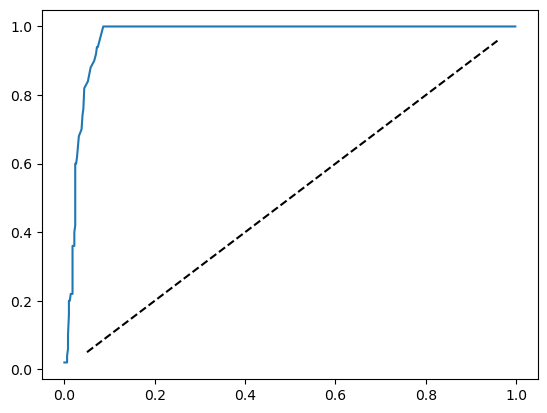

In [25]:
recall = []
FPR = []

probrange = np.linspace(clf_proba.predict_proba(x)[:, 1].min(), clf_proba.predict_proba(x)[:, 1].max(), 50, endpoint=False)# 不要取到最大值
flag = 1
for i in probrange:
    y_predict = []
    for j in range(x.shape[0]):
        if clf_proba.predict_proba(x)[j, 1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)

    cm = CM(y, y_predict, labels=[1, 0])# 1是少数类
    recall.append(cm[0, 0]/cm[0, :].sum())
    FPR.append(cm[1, 0]/cm[1, :].sum())
    print(flag)
    flag += 1

recall.sort()
FPR.sort()

plt.plot(FPR, recall)
plt.plot(probrange + 0.05, probrange + 0.05, c = 'black', linestyle = '--') # y = x
plt.show()



#### AUC

In [ ]:
FPR, recall, threshold = roc_curve(y, clf_proba.decision_function(x), pos_label = 1)
FPR, recall, threshold# 阈值是基于距离的阈值

(array([0.   , 0.   , 0.006, 0.006, 0.008, 0.008, 0.01 , 0.01 , 0.014,
        0.014, 0.018, 0.018, 0.022, 0.022, 0.024, 0.024, 0.028, 0.028,
        0.03 , 0.03 , 0.032, 0.032, 0.036, 0.036, 0.04 , 0.04 , 0.042,
        0.042, 0.044, 0.044, 0.05 , 0.05 , 0.054, 0.054, 0.058, 0.058,
        0.066, 0.066, 0.072, 0.072, 0.074, 0.074, 0.086, 0.086, 1.   ]),
 array([0.  , 0.02, 0.02, 0.06, 0.06, 0.16, 0.16, 0.2 , 0.2 , 0.22, 0.22,
        0.36, 0.36, 0.42, 0.42, 0.6 , 0.6 , 0.62, 0.62, 0.64, 0.64, 0.68,
        0.68, 0.7 , 0.7 , 0.74, 0.74, 0.76, 0.76, 0.82, 0.82, 0.84, 0.84,
        0.86, 0.86, 0.88, 0.88, 0.92, 0.92, 0.94, 0.94, 0.96, 0.96, 1.  ,
        1.  ]),
 array([         inf,   2.18236076,   1.48676267,   1.35964325,
          1.33920817,   1.14038015,   1.13383091,   1.00003406,
          0.85085628,   0.84476439,   0.78571364,   0.60568093,
          0.5389064 ,   0.46718521,   0.44396046,   0.03907036,
         -0.07011269,  -0.10668727,  -0.1258212 ,  -0.13845693,
         -0

In [33]:
area = roc_auc_score(y, clf_proba.decision_function(x))
area 

0.9696400000000001

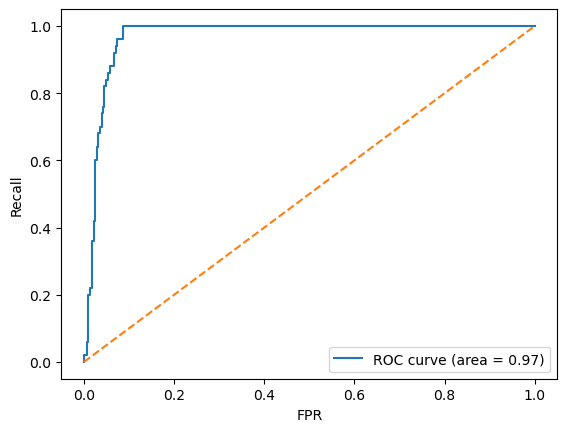

In [35]:
plt.figure()
plt.plot(FPR, recall
         , label = 'ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('Recall')
plt.legend()
plt.show()

#### 利用ROC曲线求解最佳阈值

我们希望模型在增强捕获少数类的同时，尽量不要误伤多数类。也就是随着Recall的增大，FPR的大小越小越好。

所以我们希望寻找的点，就是**Recall和FPR差距最大**的点。这点也叫`约登指数`。

In [41]:
maxindex = (recall - FPR).tolist().index(max(recall - FPR))
maxindex

43

In [ ]:
threshold[maxindex]# 这个是距离，不是概率

-1.0860191749391461

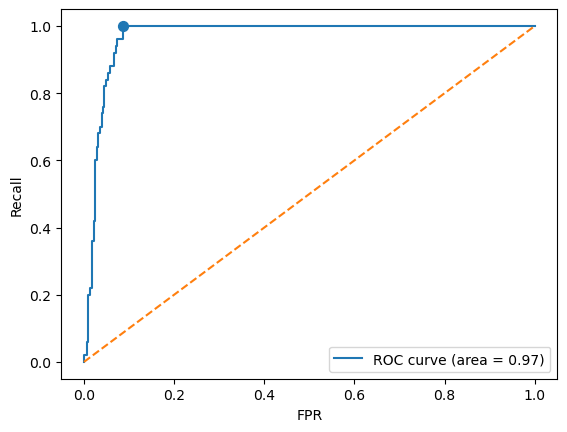

In [45]:
plt.figure()
plt.plot(FPR, recall
         , label = 'ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.scatter(FPR[maxindex], recall[maxindex], s = 50)
plt.xlabel('FPR')
plt.ylabel('Recall')
plt.legend()
plt.show()
